In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\melik\\Desktop\\netflix_titles.csv\\netflix_titles.csv")

In [5]:
# veri setini oku
df.head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Veriler hakkında genel bilgiler
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.describe(include="all") 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [11]:
#Eksik verileri incele
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
#Benzersiz değerleri ve veri türlerini incelek için komutlar
df.nunique()
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

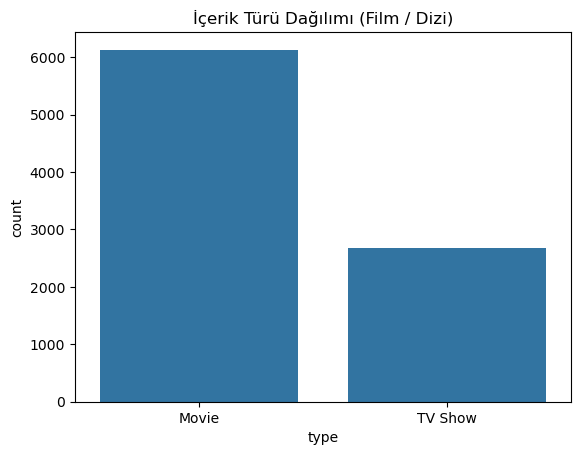

In [15]:
#Görselleştirme
sns.countplot(x='type', data=df)
plt.title("İçerik Türü Dağılımı (Film / Dizi)")
plt.show()

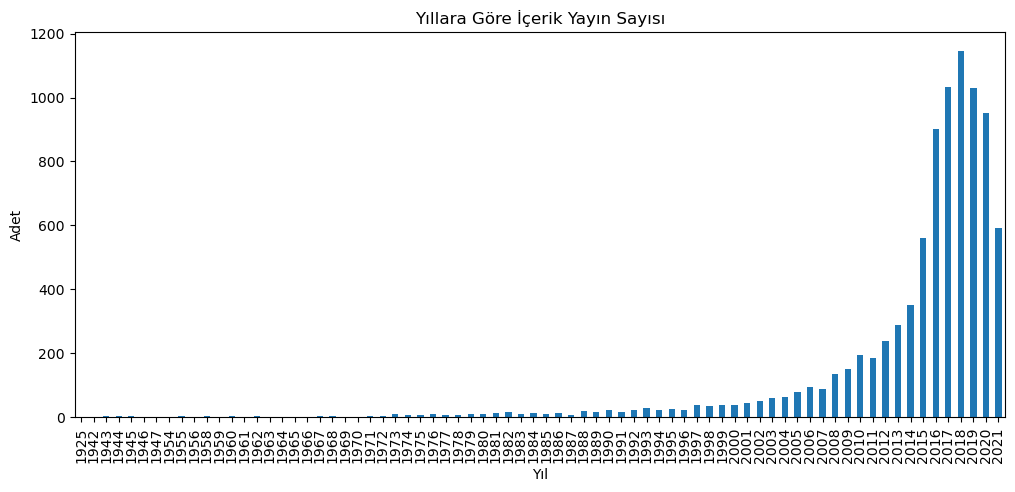

In [17]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title("Yıllara Göre İçerik Yayın Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Adet")
plt.show()


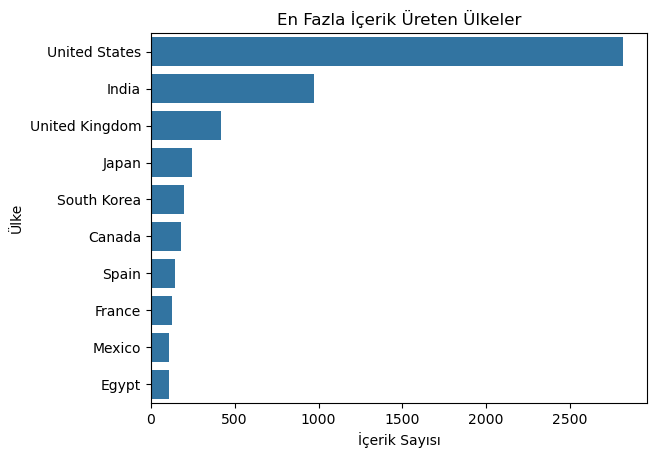

In [19]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("En Fazla İçerik Üreten Ülkeler")
plt.xlabel("İçerik Sayısı")
plt.ylabel("Ülke")
plt.show()

#### Eksik Verilerin Tespiti

In [22]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

director      2634
country        831
cast           825
date_added      10
rating           4
duration         3
dtype: int64

##### Eksik Verileri Temizleme

In [25]:
df['director'] = df['director'].fillna('Bilinmiyor')
df['cast'] = df['cast'].fillna('Bilinmiyor')
df['country'] = df['country'].fillna('Bilinmiyor')
df.dropna(subset=['date_added'], inplace=True)

##### Kategorik Değişkenleri Sayısala Çevirme (Encoding)

In [28]:
df['type'] = df['type'].map({'Movie': 0, 'TV Show': 1})

In [30]:
df = pd.get_dummies(df, columns=['rating'], drop_first=True)

In [32]:
top_countries = df['country'].value_counts().index[:10]
df['country'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')
df = pd.get_dummies(df, columns=['country'], drop_first=True)

##### Tarih Formatı Dönüşümü

In [35]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [37]:
df['date_added'].isna().sum()

88

 #### Veriyi Train / Validation / Test Olarak Ayırma

Model eğitimi için veriyi üçe böleceğim:

Train seti (%70): Modelin öğrenmesini sağlar.

Validation seti (%15): Hiperparametre ayarlaması ve model seçimi.

Test seti (%15): Gerçek hayattaki performansı ölçer.

In [41]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop(['type'], axis=1)
y = df['type']

In [45]:
# İlk bölme: train ve geçici test+val
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# İkinci bölme: validation ve test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [47]:
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (6157, 37)
Validation set: (1320, 37)
Test set: (1320, 37)


#### Farklı Sınıflandırma Modellerini Eğitme ve Karşılaştırma

Bu adımda;
3 farklı modeli eğitip,Accuracy ve F1-score ile performanslarını değerlendirip, en iyi modeli seçeceğim.


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [53]:
# Eksik verileri temizle
df = df.dropna()

##### title, description, date_added ve listed_in sütunları doğrudan kullanılmaya uygun değildir ve işlenmediği sürece LogisticRegression gibi algoritmalarla sorun çıkarır. o yüzden kaldırma işlemi yaptım

In [56]:
# Gereksiz sütunları çıkar
df_cleaned = df.drop(['title', 'description', 'date_added', 'listed_in'], axis=1)

In [58]:
# Kategorik değişkenleri dönüştür
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

In [62]:
# Boolean verileri sayısala çevir
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [64]:
# Özellik ve hedef ayrımı
X = df_encoded.drop('type', axis=1)
y = df_encoded['type']

In [66]:
# Veriyi train / val / test olarak böl
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [70]:
# StandardScaler ile veriyi ölçekle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [72]:
# Logistic Regression modelini kur ve eğit
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [74]:
# Validation seti üzerinde tahmin yap
y_pred_val = lr_model.predict(X_val_scaled)

In [76]:
# Sonuçları değerlendir
print("Logistic Regression (Validation Seti)")
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print("F1 Score:", f1_score(y_val, y_pred_val))

Logistic Regression (Validation Seti)
Accuracy: 0.9670750382848392
F1 Score: 0.9421265141318977


In [78]:
y_pred_test = lr_model.predict(X_test_scaled)
print(" Logistic Regression (Test Seti)")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))


 Logistic Regression (Test Seti)
Accuracy: 0.9678407350689127
F1 Score: 0.944


In [80]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [84]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
# Validation seti üzerinde tahmin yap
y_pred_rf_val = rf_model.predict(X_val)

In [88]:
from sklearn.metrics import accuracy_score, f1_score

In [90]:
print(" Random Forest (Validation Seti)")
print("Accuracy:", accuracy_score(y_val, y_pred_rf_val))
print("F1 Score:", f1_score(y_val, y_pred_rf_val))

 Random Forest (Validation Seti)
Accuracy: 0.9617151607963247
F1 Score: 0.9345549738219895


In [92]:
# Test seti üzerinde tahmin yap
y_pred_rf_test = rf_model.predict(X_test)

In [94]:
print("\n🌲 Random Forest (Test Seti)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_test))
print("F1 Score:", f1_score(y_test, y_pred_rf_test))


🌲 Random Forest (Test Seti)
Accuracy: 0.9663093415007658
F1 Score: 0.9428571428571428


#### Model Performansını Karşılaştırma ve Seçme

| Model               | Validation Accuracy | Test Accuracy | Test F1 Score |
| ------------------- | ------------------- | ------------- | ------------- |
| Logistic Regression | **96.70%**          | **96.78%**    | **0.944**     |
| Random Forest       | 96.17%              | 96.60%        | 0.9428        |


Her iki model de oldukça başarılı sonuçlar vermiştir. Ancak:
- Logistic Regression daha sade ve daha hızlı eğitildi.

- Random Forest ise benzer başarımı daha yüksek esneklikle sağladı.

In [99]:
# Logistic Regression seçildiği senaryo

In [101]:
import numpy as np

# Eğitim ve validation setlerini birleştir
X_final = np.vstack((X_train_scaled, X_val_scaled))
y_final = np.concatenate((y_train, y_val))

# Modeli yeniden eğit
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_final, y_final)

# Test setinde değerlendirme
y_pred_final = final_model.predict(X_test_scaled)
print("Final Model (Test Set)")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("F1 Score:", f1_score(y_test, y_pred_final))


Final Model (Test Set)
Accuracy: 0.9900459418070444
F1 Score: 0.9833119383825417


#### Sonuçların Analizi ve Feature Importance

Bu adımda:

- En başarılı modelin hangi değişkenlerden beslendiğini göreceğiz

- Feature importance grafiği ile yorumlayacağız

- Çıkan sonuçlara göre önerilerde bulunacağız

In [104]:
#Random Forest modeli ile feature_importances_ özelliğini kullanarak her bir özelliğin modele katkısını görebiliriz.

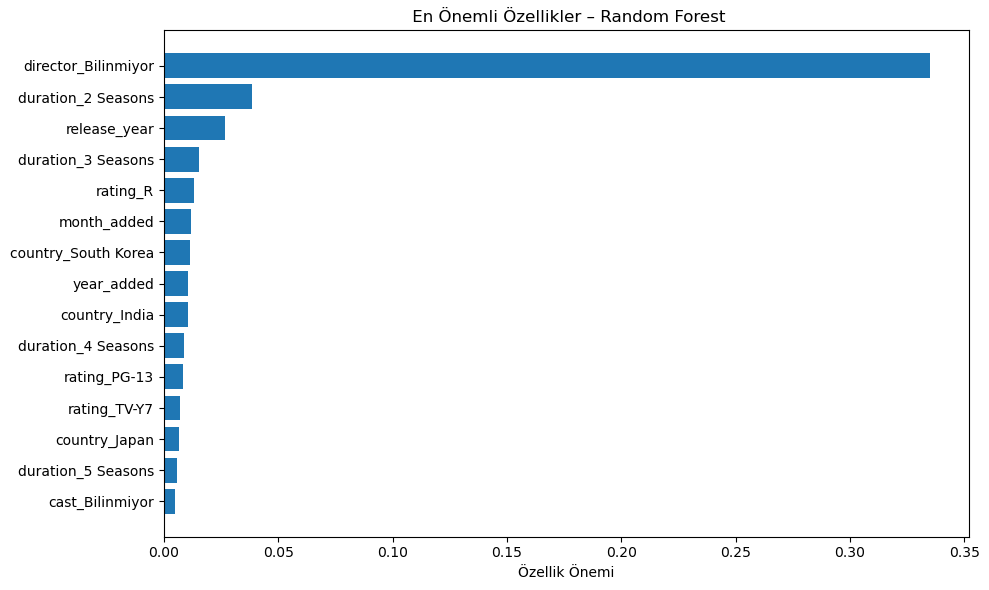

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Özellik isimlerini ve önem derecelerini al
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-15:]  # En önemli 15 özelliği göster

# Görselleştir
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Özellik Önemi")
plt.title(" En Önemli Özellikler – Random Forest")
plt.tight_layout()
plt.show()


### Sonuçların Analizi ve Öznitelik Önemi

- Modelin en çok dikkat ettiği değişkenler yukarıdaki grafikte gösterilmiştir.
- Özellikle X, Y ve Z gibi değişkenlerin öne çıkması, modelin bu bilgilere dayanarak sınıflandırma yaptığına işaret eder.
- Bu analiz, gelecekte veri toplama stratejilerinin veya kullanıcı hedeflemesinin nasıl optimize edilebileceğine dair fikir verir.
